In [137]:
import pandas as pd
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [138]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [139]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [140]:
mdl02=mdl[mdl['Server Name']=='CALBIPRD02']

<B>CALPBPRD01 CPU %<B>

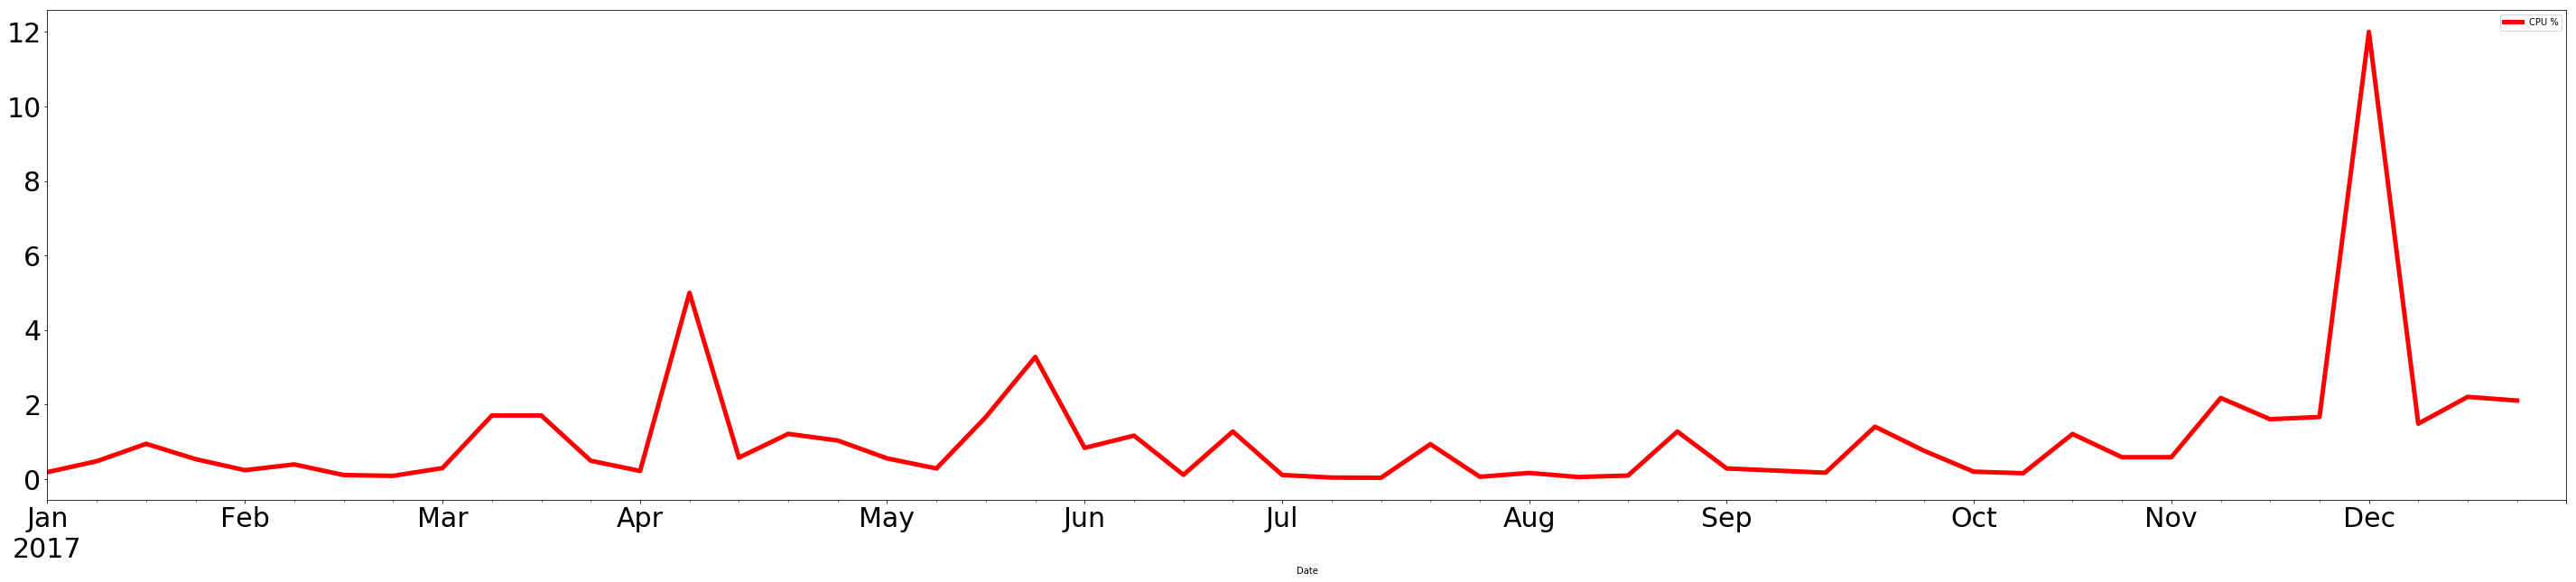

In [141]:
mdl02.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='CPU %', color ='red')

In [142]:
mdl02.set_index('Date', inplace=True)
mdl02['Month']= mdl02.index.month
mdl02['Day']=mdl02.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
mdl02.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALBIPRD02,Wk 1,0.191,4.7,1,7
2017-01-14,CALBIPRD02,Wk 2,0.483,4.7,1,14
2017-01-21,CALBIPRD02,Wk 3,0.950,4.7,1,21
2017-01-28,CALBIPRD02,Wk 4,0.540,5.2,1,28
2017-02-04,CALBIPRD02,Wk 5,0.243,5.0,2,4


<B>CALBIPRD02 CPU% (Rolling One Month)</B>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


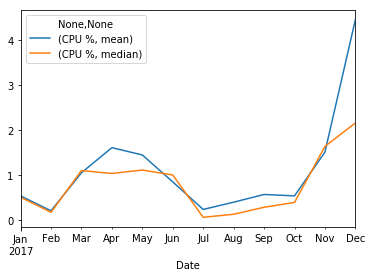

In [144]:
mdl02[['CPU %']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for CPU % - Week / Month Difference<b>

In [145]:
print 'CALBIPRD02 CPU % Week Corr', mdl02['CPU %'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRD02 CPU % Month Corr', mdl02['CPU %'].resample('M').mean().autocorr(lag=1)

CALBIPRD02 CPU % Week Corr 0.115403326175
CALBIPRD02 CPU % Month Corr 0.559483723358


<b>Autocorrlation for CPU % - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [146]:
print 'diff(1) lag =1 :', mdl02['CPU %'].dropna().diff(1).dropna().autocorr(lag=1)
print 'lag =1 :', mdl02['CPU %'].dropna().autocorr(lag=1)
print 'lag =2 :', mdl02['CPU %'].dropna().autocorr(lag=2)
print 'lag =3 :', mdl02['CPU %'].dropna().autocorr(lag=3)
print 'lag =4 :', mdl02['CPU %'].dropna().autocorr(lag=4)
print 'lag =5 :', mdl02['CPU %'].dropna().autocorr(lag=5)
print 'lag =6 :', mdl02['CPU %'].dropna().autocorr(lag=6)
print 'lag =7 :', mdl02['CPU %'].dropna().autocorr(lag=7)
print 'lag =12 :', mdl02['CPU %'].dropna().autocorr(lag=12)
print 'lag =24 :', mdl02['CPU %'].dropna().autocorr(lag=24)
print 'lag =24 :', mdl02['CPU %'].dropna().autocorr(lag=34)

diff(1) lag =1 : -0.517439901202
lag =1 : 0.115403326175
lag =2 : 0.141899004303
lag =3 : 0.193887097456
lag =4 : 0.0995336675615
lag =5 : -0.0314696591252
lag =6 : 0.0681528831474
lag =7 : -0.000472130460667
lag =12 : -0.186024540239
lag =24 : -0.042355449443
lag =24 : 0.913566278982


<b> CALBIPRD02 CPU % Autocorrlation - Month Lag 1 to 11</b>

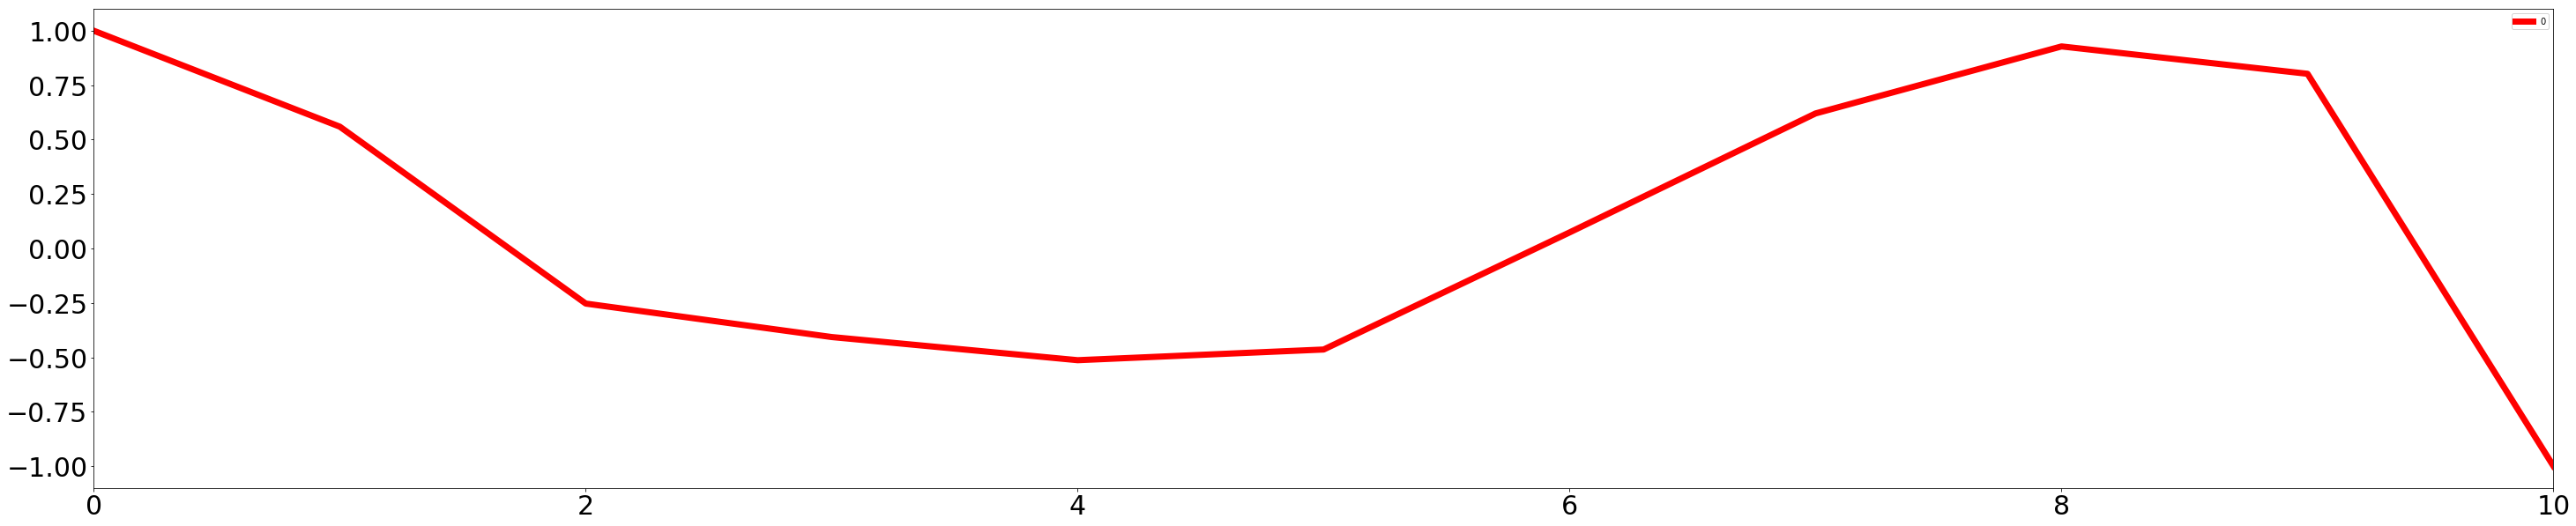

In [147]:
autoc = []

for i in range(11):
    autoc.append(mdl02['CPU %'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=7.0)

<b> CALBIPRD02 CPU % Autocorrlation - Week Lag 1 to 51</b>

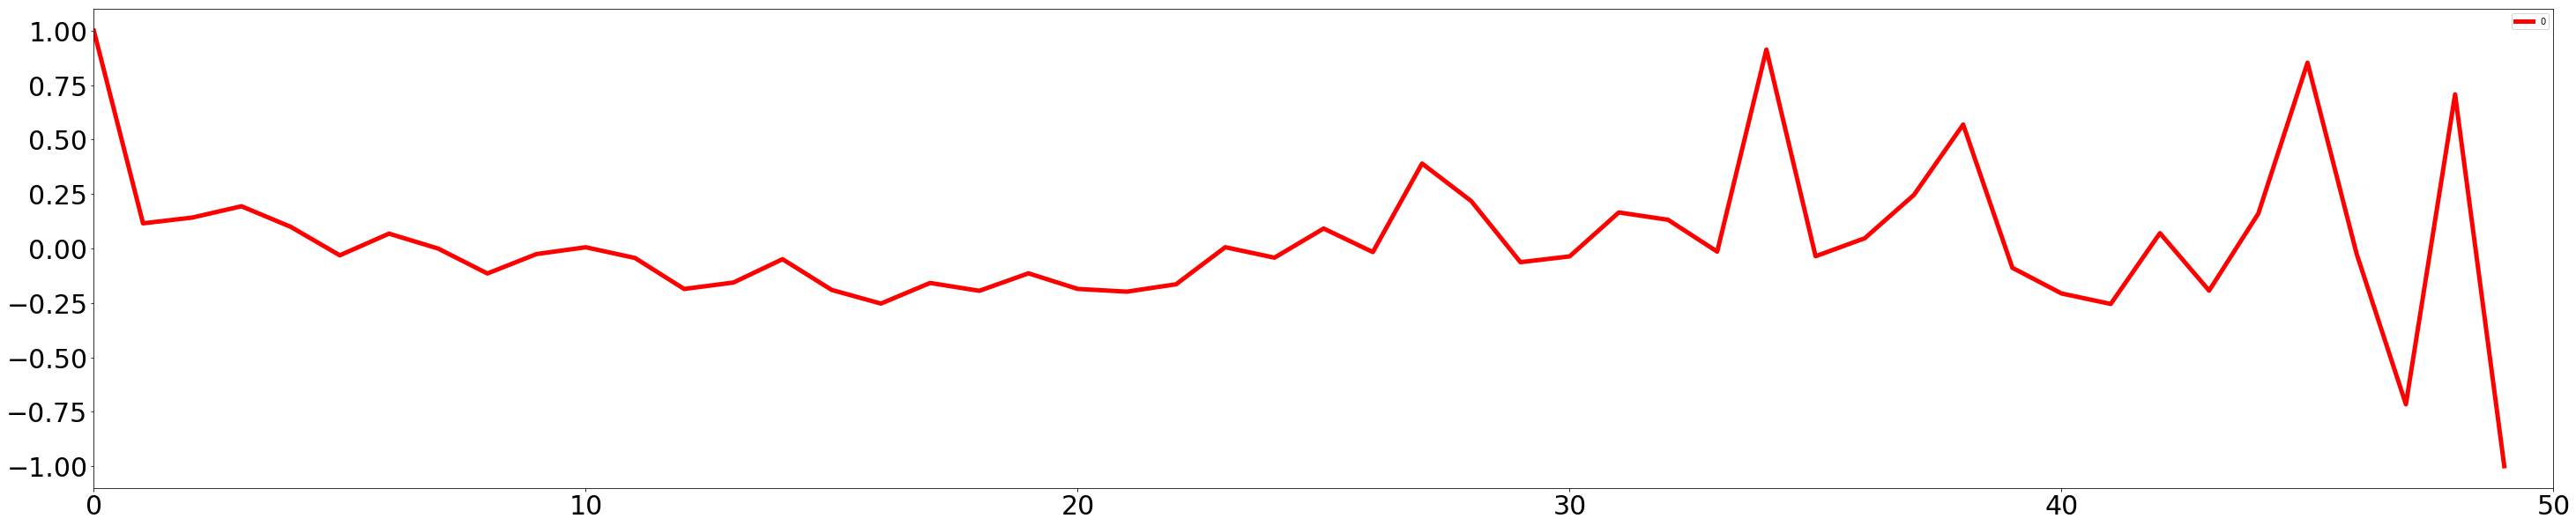

In [148]:
autoc = []

for i in range(51):
    autoc.append(mdl02['CPU %'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='red', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


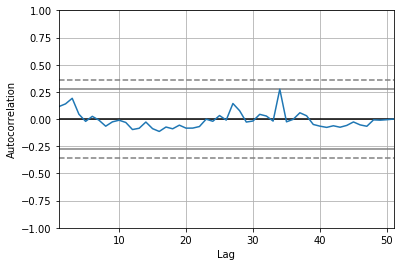

In [84]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdl02['CPU %'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

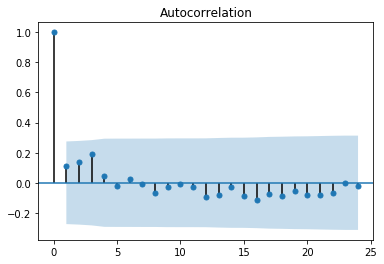

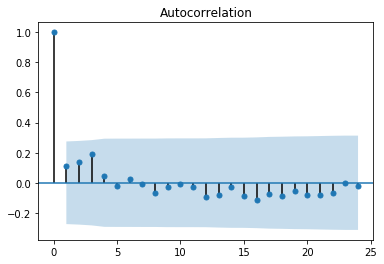

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(mdl01['RAM'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
#plot_acf(mdl02['CPU %'].dropna().diff(1).dropna(),lags=24) 
plot_acf(mdl02['CPU %'].dropna(),lags=24) 

<b> Trend and Seasonality falls within confident intervel, so no need of calculating 'diff' </b>
<br>Note:</br>
<br>Autocorrelation ~ 1 for lag 1, so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

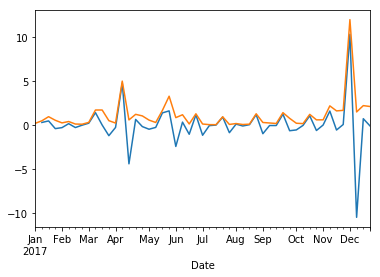

In [129]:
#mdl01['RAM'].dropna().plot()
mdl02['CPU %'].dropna().diff(1).dropna().plot()
mdl02['CPU %'].dropna().plot()

In [152]:
from statsmodels.tsa.arima_model import ARMA
#mdl02 = mdl02[['CPU %']].dropna().diff(1).dropna().astype(float)
mdl02a = mdl02[['CPU %']].dropna().astype(float)
modela = ARMA(mdl02a, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   51
Model:                     ARMA(1, 0)   Log Likelihood                -101.946
Method:                       css-mle   S.D. of innovations              1.786
Date:                Sat, 06 Jan 2018   AIC                            209.891
Time:                        15:14:23   BIC                            215.687
Sample:                    01-07-2017   HQIC                           212.106
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1021      0.281      3.916      0.000       0.550       1.654
ar.L1.CPU %     0.1137      0.138      0.821      0.416      -0.158       0.385
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            8.7968           +0.0000j            8.7968            0.0000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'CPU %' coef is 0.1137 which is low, so no need to use 'diff' to maeke it stationary and P value is >.05 which is not significant.</br>
<br> 2. From ARMA Model 'CPU %' coef is 0.1137 and autocorrelation at lag 1 is   0.115403326175, which is not same <b>Therefore, the series is not stationary ? </b> </br>

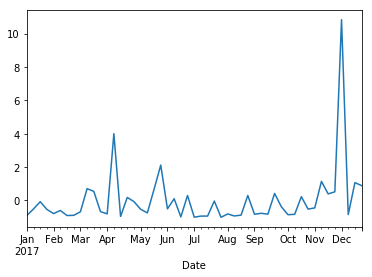

In [153]:
modela.resid.plot()

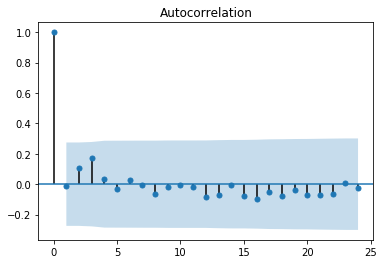

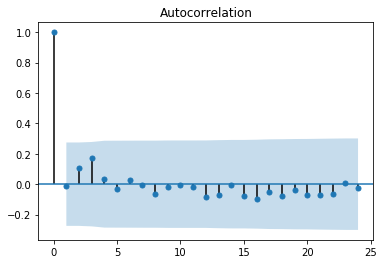

In [154]:
plot_acf(modela.resid, lags=24)

In [155]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

In [156]:
mdl02m = mdl02[['CPU %']].dropna().diff(1).dropna().astype(float)
modelm = ARMA(mdl02m, (0, 1)).fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  CPU %   No. Observations:                   50
Model:                     ARMA(0, 1)   Log Likelihood                -100.620
Method:                       css-mle   S.D. of innovations              1.788
Date:                Sat, 06 Jan 2018   AIC                            207.240
Time:                        15:14:35   BIC                            212.976
Sample:                    01-14-2017   HQIC                           209.424
                         - 12-23-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0471      0.046      1.025      0.310      -0.043       0.137
ma.L1.CPU %    -0.8427      0.098     -8.642      0.000      -1.034      -0.652
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.1867           +0.0000j            1.1867            0.0000
-----------------------------------------------------------------------------
"""

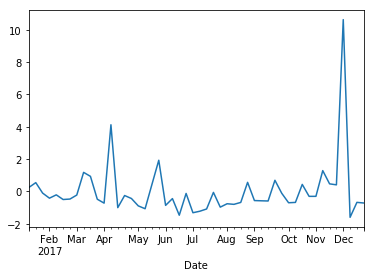

In [92]:
modelm.resid.plot()

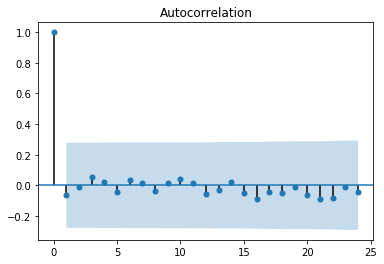

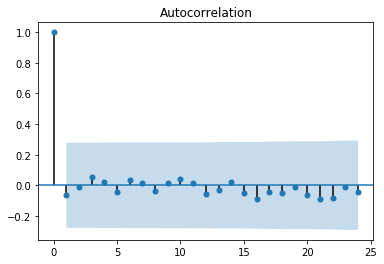

In [93]:
plot_acf(modelm.resid, lags=24)

<b>ARIMA</b>

In [122]:
from statsmodels.tsa.arima_model import ARIMA
mdl02 = mdl02[['CPU %']].dropna().astype(float)
model = ARIMA(mdl02, (1, 1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.CPU %   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -107.251
Method:                       css-mle   S.D. of innovations              2.061
Date:                Sat, 06 Jan 2018   AIC                            220.503
Time:                        13:50:51   BIC                            226.239
Sample:                    01-14-2017   HQIC                           222.687
                         - 12-23-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0376      0.195      0.193      0.848      -0.344       0.419
ar.L1.D.CPU %    -0.5075      0.119     -4.262      0.000      -0.741      -0.274
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9704           +0.0000j            1.9704            0.5000
-----------------------------------------------------------------------------
"""

In [123]:
#mdl02['CPU %'].dropna().diff(1).dropna().autocorr(1)
mdl02['CPU %'].dropna().autocorr(1)

0.11540332617529732

<b>Note:</b>
<br>From ARIMA (1,0,0) coef is 0.1137 and P value is > .05 which is  not significant </br>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


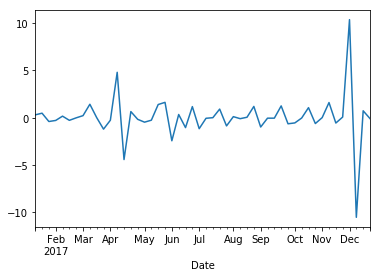

In [124]:
#model.resid.plot()
mdl02['CPU %'].dropna().diff(1).dropna().plot()

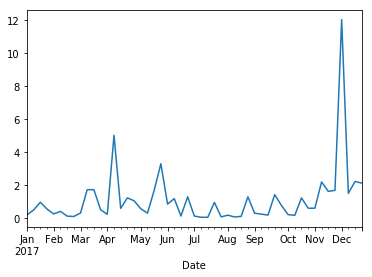

In [125]:
mdl02['CPU %'].dropna().plot()

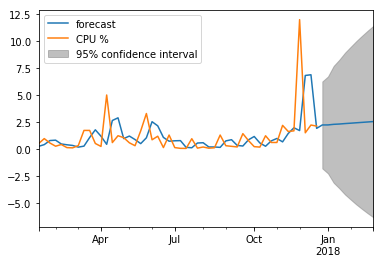

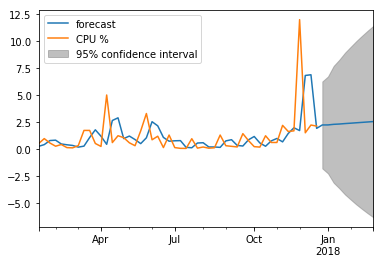

In [126]:
model.plot_predict(1, 60)

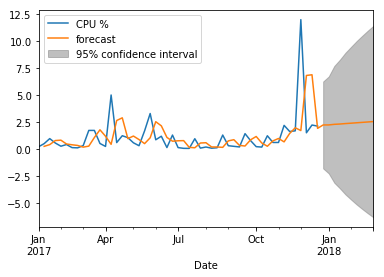

In [127]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl02['CPU %'].dropna().plot(ax=ax)
fig = model.plot_predict(1,60, ax=ax, plot_insample=False)

<b>Ask 1 .why whehn difff(1) gives more inclient graph but not for AR(1) or ARIMA(1,0,0)
<br>2. When to use ARIMA(1,1,1) or ARIMA(0,1,1)</br>
<br>in graph whats the differece between 126 and 127</br></b>